In [1205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [1206]:
df1 = pd.read_csv('/Users/butler/Documents/hp/relax_challenge/takehome_user_engagement.csv')

In [1207]:
df = pd.read_excel('/Users/butler/Documents/hp/relax_challenge/takehome_users.xlsx')

In [1208]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [1209]:
df1.shape

(207917, 3)

In [1210]:
df1.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [1211]:
df1[df1.user_id == 8068]

,time_stamp,user_id,visited
140780,2012-06-01 20:02:35,8068,1
140781,2012-06-12 20:02:35,8068,1
140782,2012-06-29 20:02:35,8068,1
140783,2012-07-12 20:02:35,8068,1
140784,2012-07-18 20:02:35,8068,1
...,...,...,...
141360,2014-05-25 20:02:35,8068,1
141361,2014-05-26 20:02:35,8068,1
141362,2014-05-27 20:02:35,8068,1
141363,2014-05-28 20:02:35,8068,1


In [1212]:
df2 = df1.groupby(by=['user_id']).sum()

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_735/311764771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby(by=['user_id']).sum()


In [1213]:
df2.head()

,visited
user_id,
1,1
2,14
3,1
4,1
5,1


In [1214]:
df2 = df2.drop(df2[df2.visited < 3].index)

In [1215]:
df2.head()

,visited
user_id,
2,14
10,284
20,7
33,18
42,342


In [1216]:
df2 = df2.reset_index()

In [1217]:
df2.head()

,user_id,visited
0,2,14
1,10,284
2,20,7
3,33,18
4,42,342


In [1218]:
df2.shape

(2248, 2)

In [1219]:
a = df2['user_id']
a.shape

(2248,)

In [1220]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [1221]:
df1 = df1[df1.user_id.isin(df2.user_id)]

In [1222]:
df1.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [1223]:
df1.time_stamp.max()

'2014-06-04 23:56:26'

In [1224]:
df1.time_stamp.min()

'2012-05-31 15:47:36'

In [1225]:
df1.user_id.nunique()

2248

In [1226]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  201002 non-null  object
 1   user_id     201002 non-null  int64 
 2   visited     201002 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [1227]:
df1.time_stamp = pd.to_datetime(df1.time_stamp)

In [1228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  201002 non-null  datetime64[ns]
 1   user_id     201002 non-null  int64         
 2   visited     201002 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.1 MB


In [1229]:
df2 = df1.time_stamp.diff()

In [1230]:
df2.head()

1       NaT
2   14 days
3   10 days
4   16 days
5    6 days
Name: time_stamp, dtype: timedelta64[ns]

In [1231]:
type(df2)

pandas.core.series.Series

In [1232]:
user_id = df1.user_id

In [1233]:
df3 = pd.DataFrame()

In [1234]:
df3['time_diff'] = df2

In [1235]:
df3['user_id'] = user_id

In [1236]:
df3.head()

,time_diff,user_id
1,NaT,2
2,14 days,2
3,10 days,2
4,16 days,2
5,6 days,2


In [1237]:
df2 = df1.time_stamp.diff(periods=2)

In [1238]:
df3['time_diff'] = df2

In [1239]:
df3.head()

,time_diff,user_id
1,NaT,2
2,NaT,2
3,24 days,2
4,26 days,2
5,22 days,2


In [1240]:
df3.tail()

,time_diff,user_id
207905,-37 days +03:17:58,11991
207906,-37 days +03:17:58,11991
207907,8 days 00:00:00,11991
207908,22 days 00:00:00,11991
207909,32 days 00:00:00,11991


In [1241]:
df3['days_diff'] = df3['time_diff'] / pd.to_timedelta(1, unit='D')

In [1242]:
df3.head()

,time_diff,user_id,days_diff
1,NaT,2,NaN
2,NaT,2,NaN
3,24 days,2,24.0
4,26 days,2,26.0
5,22 days,2,22.0


In [1243]:
df3.isnull().value_counts()

time_diff  user_id  days_diff
False      False    False        201000
True       False    True              2
dtype: int64

In [1244]:
df3 = df3.dropna()

In [1245]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201000 entries, 3 to 207909
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   time_diff  201000 non-null  timedelta64[ns]
 1   user_id    201000 non-null  int64          
 2   days_diff  201000 non-null  float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 6.1 MB


In [1246]:
df3.isnull().value_counts()

time_diff  user_id  days_diff
False      False    False        201000
dtype: int64

In [1247]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201000 entries, 3 to 207909
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   time_diff  201000 non-null  timedelta64[ns]
 1   user_id    201000 non-null  int64          
 2   days_diff  201000 non-null  float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 6.1 MB


In [1248]:
df3.days_diff = df3.days_diff.astype(int)

In [1249]:
df3.head()

,time_diff,user_id,days_diff
3,24 days,2,24
4,26 days,2,26
5,22 days,2,22
6,14 days,2,14
7,34 days,2,34


In [1250]:
df3.tail()

,time_diff,user_id,days_diff
207905,-37 days +03:17:58,11991,-36
207906,-37 days +03:17:58,11991,-36
207907,8 days 00:00:00,11991,8
207908,22 days 00:00:00,11991,22
207909,32 days 00:00:00,11991,32


In [1251]:
df4 = df3[df3.days_diff <=7]

In [1252]:
df4.head()

,time_diff,user_id,days_diff
9,6 days 00:00:00,2,6
10,5 days 00:00:00,2,5
11,7 days 00:00:00,2,7
20,-421 days +18:22:59,10,-420
21,-433 days +18:22:59,10,-432


In [1253]:
df4 = df4[df4.days_diff >= 0]

In [1254]:
df4.head()

,time_diff,user_id,days_diff
9,6 days,2,6
10,5 days,2,5
11,7 days,2,7
24,7 days,10,7
27,5 days,10,5


In [1255]:
adopter_users = df4.user_id[np.diff(df4.user_id, prepend=np.nan).astype(bool)]

In [1256]:
adopter_users

9             2
24           10
312          20
331          33
353          42
          ...  
207456    11965
207468    11967
207508    11969
207649    11975
207875    11988
Name: user_id, Length: 1665, dtype: int64

In [1257]:
type(adopted_users)

list

In [1258]:
adopted_users = list(adopted_users)

In [1259]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [1260]:
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time, unit='s')

/Users/butler/anaconda3/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [1261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [1262]:
df.drop('last_session_creation_time', axis=1, inplace=True)

In [1263]:
df.invited_by_user_id = df.invited_by_user_id.fillna(0)

In [1264]:
df.invited_by_user_id = df.invited_by_user_id.astype(int)

In [1265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 843.9+ KB


In [1266]:
df.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240


In [1267]:
adopted_u = []
for i in range(1,12001):
    if i in adopted_users:
        adopted_u.append(1)
    else:
        adopted_u.append(0)

In [1268]:
adopted_u = pd.Series(adopted_u)

In [1269]:
type(adopted_u)

pandas.core.series.Series

In [1270]:
df['adopted'] = adopted_u

In [1271]:
type(df['adopted'])

pandas.core.series.Series

In [1272]:
df.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240,0


In [1273]:
df.drop(['name', 'email'],axis=1, inplace=True)

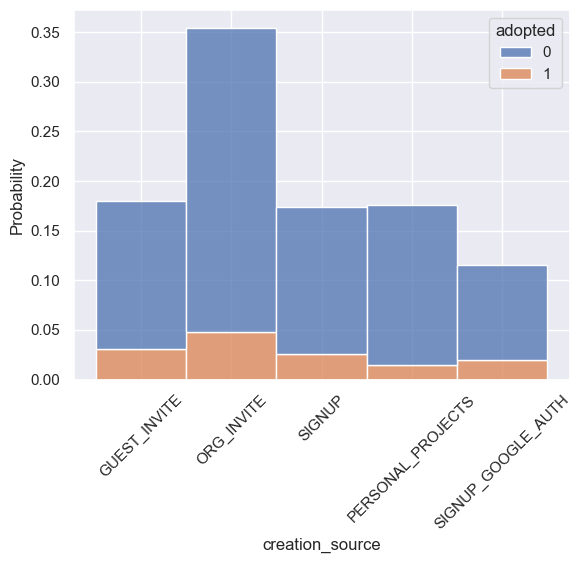

In [1274]:
_ = sns.histplot(data=df, x='creation_source', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

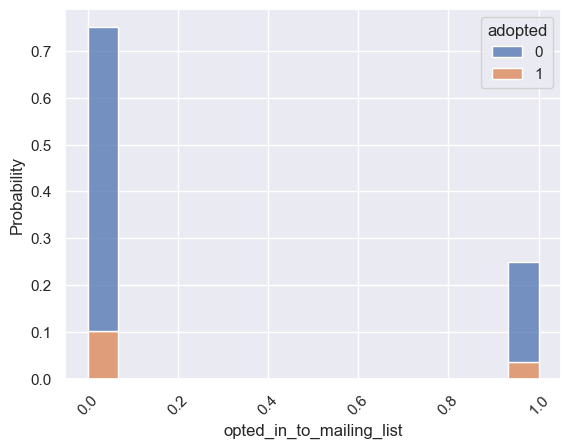

In [1275]:
_ = sns.histplot(data=df, x='opted_in_to_mailing_list', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

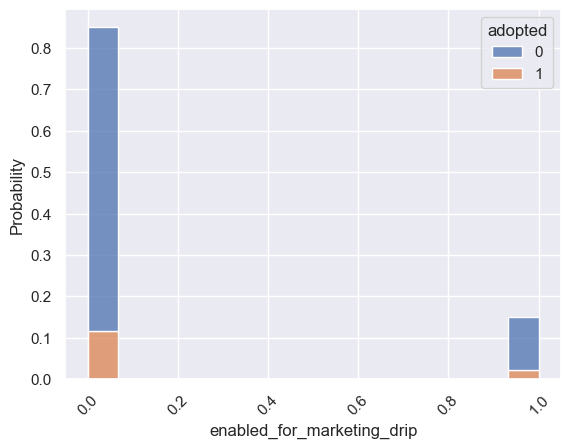

In [1276]:
_ = sns.histplot(data=df, x='enabled_for_marketing_drip', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [1277]:
df.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803,0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316,1
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240,0


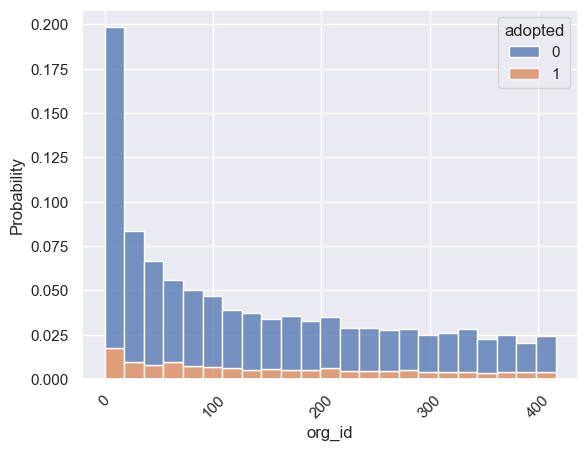

In [1278]:
_ = sns.histplot(data=df, x='org_id', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

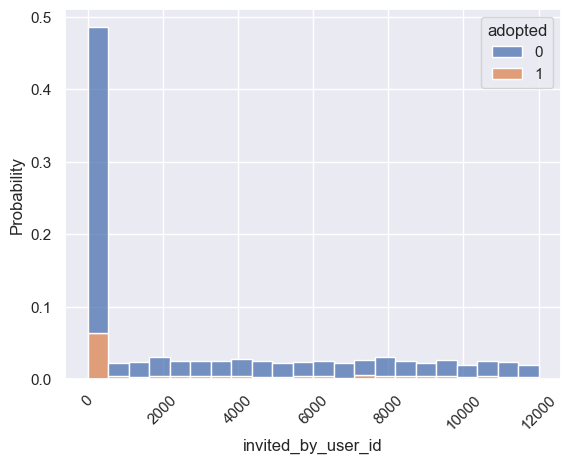

In [1279]:
_ = sns.histplot(data=df, x='invited_by_user_id', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

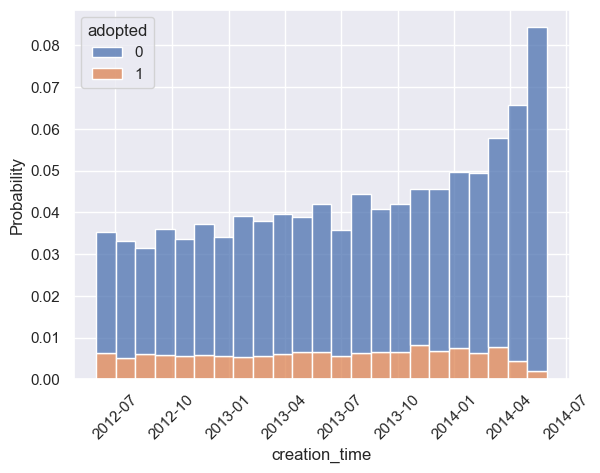

In [1280]:
_ = sns.histplot(data=df, x='creation_time', hue='adopted', stat='probability', multiple='stack')
_ = plt.xticks(rotation=45)

In [1282]:
df['month_created']=df['creation_time'].dt.month
df['year_created']=df['creation_time'].dt.year
df['day_created']=df['creation_time'].dt.day

In [1283]:
df.drop(['creation_time', 'object_id'], axis=1, inplace=True)

In [1284]:
df = pd.get_dummies(df)

In [1285]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,month_created,year_created,day_created,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803,0,4,2014,22,1,0,0,0,0
1,0,0,1,316,1,11,2013,15,0,1,0,0,0
2,0,0,94,1525,0,3,2013,19,0,1,0,0,0
3,0,0,1,5151,0,5,2013,21,1,0,0,0,0
4,0,0,193,5240,0,1,2013,17,1,0,0,0,0


In [1286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   org_id                              12000 non-null  int64
 3   invited_by_user_id                  12000 non-null  int64
 4   adopted                             12000 non-null  int64
 5   month_created                       12000 non-null  int64
 6   year_created                        12000 non-null  int64
 7   day_created                         12000 non-null  int64
 8   creation_source_GUEST_INVITE        12000 non-null  uint8
 9   creation_source_ORG_INVITE          12000 non-null  uint8
 10  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 11  creation_source_SIGNUP              12000 non-null  uint8
 12  crea

In [1287]:
y = df['adopted']

In [1288]:
y.shape

(12000,)

In [1289]:
X = df.drop('adopted', axis=1)

In [1290]:
X.shape

(12000, 12)

In [1291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1292]:
y_train.shape

(9000,)

In [1293]:
X_train.shape

(9000, 12)

In [1294]:
#y_train = y_train.values.reshape(-1,1)

In [1295]:
#y_train.shape

In [1296]:
lgb = LGBMClassifier()

In [1297]:
lgb.fit(X_train, y_train)

LGBMClassifier()

In [1298]:
y_pred = lgb.predict(X_test)

In [1299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2586
           1       0.00      0.00      0.00       414

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



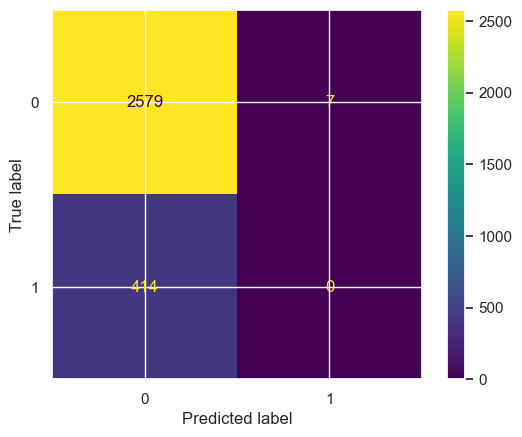

In [1300]:
cm = confusion_matrix(y_test, y_pred)

_ = ConfusionMatrixDisplay(cm).plot()

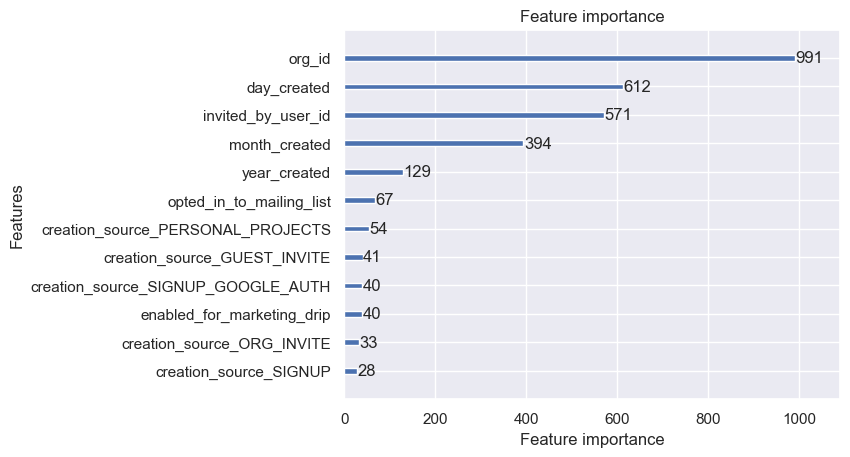

In [1301]:
_ = plot_importance(lgb)

In [1302]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1303]:
y_pred = rf.predict(X_test)

In [1304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2586
           1       0.11      0.01      0.02       414

    accuracy                           0.85      3000
   macro avg       0.48      0.50      0.47      3000
weighted avg       0.76      0.85      0.80      3000



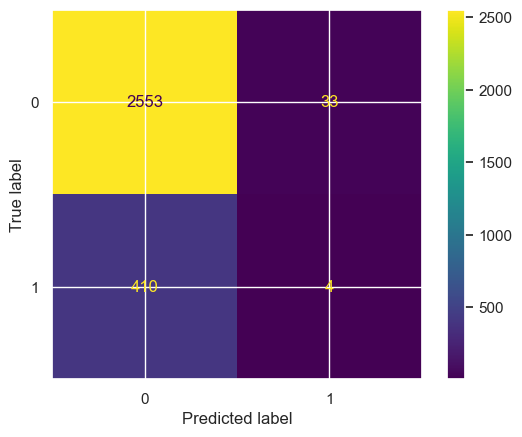

In [1305]:
cm = confusion_matrix(y_test, y_pred)

_ = ConfusionMatrixDisplay(cm).plot()